In [22]:
import pandas as pd
import numpy as np
import copy as cp
import seaborn as sns
import os
from natsort import natsorted, ns

In [23]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [127]:
#set experiment folder as root dir of this script
experiment_folder = "./data/serious-exp/"
os.chdir(experiment_folder)

FileNotFoundError: [Errno 2] No such file or directory: './data/serious-exp/'

In [210]:
#set hyperparameters 
num_generations = 20
population_size = 20 
num_runs = 20


    

In [249]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [255]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [256]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [259]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [441]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df)):
            individual = int((_fitness_df[gen][int(index)]))
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [470]:
fitness_values['19'].T[1025]

Individual_ID         1026.000000
Distance to Target      31.002776
Name: 1025, dtype: float64

In [485]:
sorted(fitness_df['generation_0'], reverse=True)

[1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 1.751830582777164e+17,
 158587367.38228932,
 137927464.13887656,
 71186015.03210467,
 70367944.9086281,
 66761876.729266,
 61596505.51444392,
 46420778.18126413,
 46403270.67557154,
 46317604.25449666,
 46229906.34094013,
 46118808.95333216,
 46118808.95333216,
 46006406.60292733,
 45898080.97233269,
 45889048.98280396,
 40041081.92203631,
 39179362

In [369]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

for run in range(num_runs):
    for gen in fitness_df.T[run]:
        
        mean_dic[gen] = [(fitness_df_run_1[gen].mean() + fitness_df_run_2[gen].mean() + fitness_df_run_2[gen].mean())/3]
        std_dic[gen] = [(fitness_df_run_1[gen].std() + fitness_df_run_2[gen].std() + fitness_df_run_2[gen].std())/3]
        min_dic[gen] = [(fitness_df_run_1[gen].min() + fitness_df_run_2[gen].min() + fitness_df_run_2[gen].min())/3]
        max_dic[gen] = [(fitness_df_run_1[gen].max() + fitness_df_run_2[gen].max() + fitness_df_run_2[gen].max())/3]
    
mean_df = pd.DataFrame(mean_dic).rename({0:"mean"})
std_df = pd.DataFrame(std_dic).rename({0:"std"})
min_df = pd.DataFrame(min_dic).rename({0:"min"})
max_df = pd.DataFrame(max_dic).rename({0:"max"})   
result_df_2 = mean_df.append(std_df).append(min_df).append(max_df).T

NameError: name 'fitness_df_run_1' is not defined

In [849]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

fitness_df_run_1 = fitness_df_run_3

for gen in fitness_df_run_1:
    mean_dic[gen] = [(fitness_df_run_1[gen].mean() + fitness_df_run_2[gen].mean() + fitness_df_run_2[gen].mean())/3]
    std_dic[gen] = [(fitness_df_run_1[gen].std() + fitness_df_run_2[gen].std() + fitness_df_run_2[gen].std())/3]
    min_dic[gen] = [(fitness_df_run_1[gen].min() + fitness_df_run_2[gen].min() + fitness_df_run_2[gen].min())/3]
    max_dic[gen] = [(fitness_df_run_1[gen].max() + fitness_df_run_2[gen].max() + fitness_df_run_2[gen].max())/3]
    
mean_df = pd.DataFrame(mean_dic).rename({0:"mean"})
std_df = pd.DataFrame(std_dic).rename({0:"std"})
min_df = pd.DataFrame(min_dic).rename({0:"min"})
max_df = pd.DataFrame(max_dic).rename({0:"max"})   
result_df_3 = mean_df.append(std_df).append(min_df).append(max_df).T

In [831]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

fitness_df_run_1 = fitness_df_run_4

for gen in fitness_df_run_1:
    mean_dic[gen] = [(fitness_df_run_1[gen].mean() + fitness_df_run_2[gen].mean() + fitness_df_run_2[gen].mean())/3]
    std_dic[gen] = [(fitness_df_run_1[gen].std() + fitness_df_run_2[gen].std() + fitness_df_run_2[gen].std())/3]
    min_dic[gen] = [(fitness_df_run_1[gen].min() + fitness_df_run_2[gen].min() + fitness_df_run_2[gen].min())/3]
    max_dic[gen] = [(fitness_df_run_1[gen].max() + fitness_df_run_2[gen].max() + fitness_df_run_2[gen].max())/3]
    
mean_df = pd.DataFrame(mean_dic).rename({0:"mean"})
std_df = pd.DataFrame(std_dic).rename({0:"std"})
min_df = pd.DataFrame(min_dic).rename({0:"min"})
max_df = pd.DataFrame(max_dic).rename({0:"max"})   
result_df_4 = mean_df.append(std_df).append(min_df).append(max_df).T

Index(['generation_0', 'generation_1', 'generation_2', 'generation_3',
       'generation_4', 'generation_5', 'generation_6', 'generation_7',
       'generation_8', 'generation_0', 'generation_1', 'generation_2',
       'generation_3', 'generation_4', 'generation_5', 'generation_6',
       'generation_7', 'generation_8', 'generation_0', 'generation_1',
       'generation_2', 'generation_3', 'generation_4', 'generation_5',
       'generation_6', 'generation_7', 'generation_8'],
      dtype='object')

In [850]:
result_df = result_df_1.append(result_df_2).append(result_df_3)

In [851]:
result_df.T.columns

Index(['generation_0', 'generation_1', 'generation_2', 'generation_3',
       'generation_4', 'generation_5', 'generation_6', 'generation_7',
       'generation_8', 'generation_0', 'generation_1', 'generation_2',
       'generation_3', 'generation_4', 'generation_5', 'generation_6',
       'generation_7', 'generation_8', 'generation_0', 'generation_1',
       'generation_2', 'generation_3', 'generation_4', 'generation_5',
       'generation_6', 'generation_7', 'generation_8'],
      dtype='object')

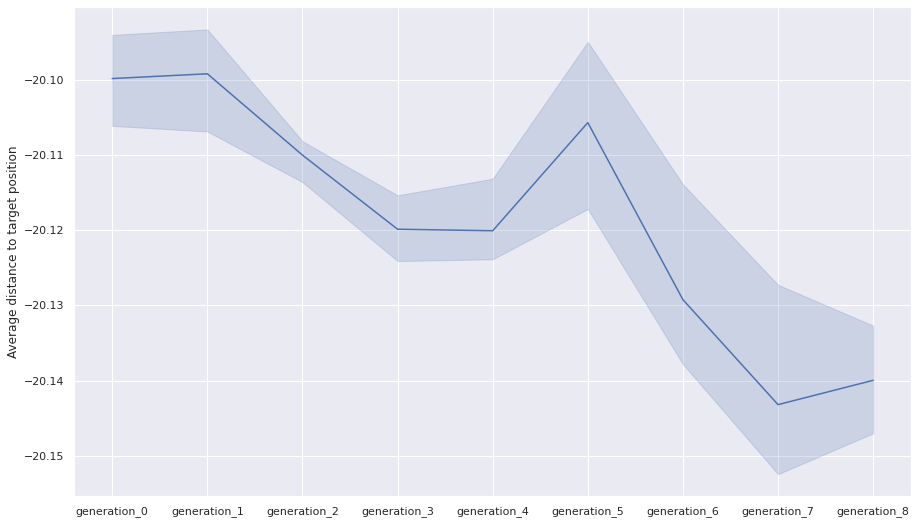

In [852]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()


In [853]:
import os

generation_identifiers = []
generation_dir_run_1 = "./1/generations/"
for filename in sorted(os.listdir("./1/generations")):
    current_generation_ids = pd.read_csv(generation_dir_run_1+filename+"/identifiers.txt", header=None)
    _generation_ids.rename({0: filename}, axis=1, inplace=True)
    generation_identifiers.append(_generation_ids)
    
    


In [854]:
generation_identifiers[9]

,generation_1
0,19
1,14
2,10
3,5
4,9
5,13
6,18
7,8
8,17
9,4


In [855]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

KeyError: 'generation_0'

In [856]:
import matplotlib.pyplot as plt

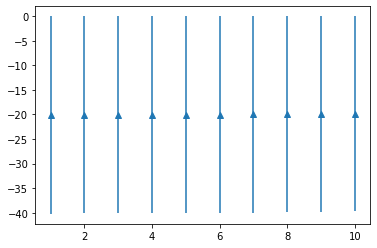

In [129]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [692]:
max((result_df['max']))

-19.270146693442285

Individual_ID         41.00000
Distance to Target   -19.07879
Name: 40, dtype: float64

,Individual_ID,Distance to Target
40,41.0,-19.078790
40,41.0,-20.099967
40,41.0,-20.092420


In [750]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

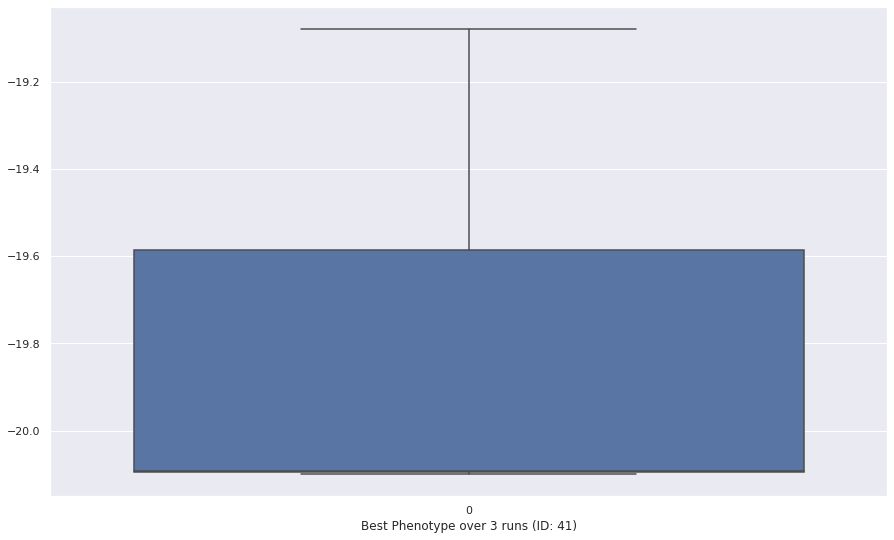

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')